# CART - Classification and Regression Tree for classification¶

`Team:` Loading...

`Team Member:` Zhangchi Fan, Kexin Lin, Yixuan Wang, Zhecheng Zhang

`Github Link: `https://github.com/Drowsywolf/data2060_final_project

## 1. Overview

#### What is CART?

Classification and Regression Trees (CART) is a versatile and widely used supervised machine learning algorithm developed by Breiman et al. in 1984. CART constructs a binary decision tree by recursively partitioning the feature space. While CART is applicable to both classification and regression tasks, this project focuses exclusively on its application for **classification**.
In the context of classification, CART aims to create a model that predicts the categorical target variable by learning decision rules inferred from the input features.

#### How CART Works for Classification

1. **Tree Construction:**
   - Splitting Criteria: CART employs metrics such as *Gini impurity* or *Entropy (Information Gain)* to determine the best feature and threshold to split the data at each node. The goal is to maximize the purity of the child nodes compared to the parent node.
     - Gini Impurity: Measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
     - Entropy: Quantifies the uncertainty or disorder within the dataset. Information Gain is the reduction in entropy achieved by a split.
   - Recursive Partitioning: Starting from the root node, CART recursively splits the dataset into subsets based on the chosen feature and threshold, creating internal nodes. This process continues until a stopping criterion is met (e.g., maximum tree depth, minimum samples per leaf).
   
2. **Tree Pruning:**
   - To prevent overfitting, CART may implement pruning strategies such as pre-pruning (e.g., limiting the maximum depth of the tree) or post-pruning (e.g., removing branches that have little importance).

3. **Prediction:**
   - For classification, predictions are made by traversing the tree from the root to a leaf node based on the input features. The class label of the leaf node is assigned as the predicted class for the input instance.

#### Advantages of CART for Classification

1. **Interpretability and Visualization:** The tree structure is intuitive and can be visualized, making it straightforward to interpret how decisions are made. Each decision path can be easily followed, providing clear insights into the model's reasoning.

2. **Handling Various Data Types:** CART can handle both numerical and categorical data without the need for extensive preprocessing or feature scaling.

3. **Flexibility:** Being a non-parametric method, CART does not assume any underlying distribution of the data, allowing it to model complex relationships.

4. **Feature Selection:** The algorithm inherently performs feature selection by choosing the most informative features for splits, reducing the need for manual feature engineering.

#### Disadvantages of CART for Classification

1. **Prone to Overfitting:** Without proper pruning or setting constraints (like maximum depth), CART can create overly complex trees that capture noise in the training data, leading to poor generalization on unseen data.

2. **Instability:** Small changes in the training dataset can result in significantly different tree structures, making CART models sensitive to the specific data they are trained on.

3. **Bias Towards Features with More Levels:** Features with a larger number of unique values or levels can be favored during splits, potentially overshadowing equally important features with fewer levels.

4. **Lack of Smoothness:** CART produces piecewise constant predictions, which may not capture smooth relationships between features and the target variable effectively.

5. **Computational Complexity:** Building a large decision tree can be computationally expensive, especially with high-dimensional data, as the algorithm evaluates multiple splits at each node.

## 2. Representation

Classification CART (Classification and Regression Tree) uses a binary tree structure to split data at each node based on features, ultimately assigning a class label at each leaf node. Each split is determined by selecting the feature and threshold that maximizes class purity in the resulting subsets.

Here is a detailed abreakdown of the introduction:

#### **Binary Tree Structure**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import Image, display
image_path = '/content/drive/My Drive/CART Representation.jpg'
display(Image(filename=image_path, width=500, height=300))

CART is represented as a binary decision tree:
 - Each internal node tests a feature $x_j$ against a threshold t, dividing the dataset $S$ into two subsets:

$$
\text{Left subset: } \{(x, y) \in S : x_j \leq t\}
$$
$$
\text{Right subset: } \{(x, y) \in S : x_j > t\}
$$
where $x$ represents the feature vector, and $y$ represents the target class label.

#### **Impurity Measure (Gini Impurity)**
Each split aims to improve the “purity” of the subsets by using Gini impurity as a measure of impurity:

 - For a node t, the Gini impurity $G(t)$ is calculated as:
$$
G(t) = 1 - \sum_{k=1}^{K} p_k^2
$$
where $ p_k $ is the proportion of instances in node $ t $ belonging to class $ k $, and $ K $ is the total number of classes.


#### **Criterion of Splitting(Gain)**
CART selects the split (feature and threshold) that maximizes the **impurity reduction (Gain)**:
- The Gain from splitting node $ t $ into $ t_{\text{left}} $ and $ t_{\text{right}} $ is:
  $$
  \text{Gain}(t) = G(t) - \frac{|S_{\text{left}}|}{|S|} G(t_{\text{left}}) - \frac{|S_{\text{right}}|}{|S|} G(t_{\text{right}})
  $$
  where $ G(t) $ is the impurity of the parent node, $ G(t_{\text{left}}) $ and $ G(t_{\text{right}}) $ are the impurities of the child nodes, and $ |S_{\text{left}}| $, $ |S_{\text{right}}| $, and $ |S| $ are their respective sizes.


#### **Leaf Node Prediction**
Once a stopping condition is met, the node becomes a **leaf node**:
- **Prediction**: The predicted class at a leaf node is the majority class of the samples within that node:
  $$
  \text{Prediction} = \arg \max_k p_k
  $$
  where $ p_k $ is the proportion of samples of class $ k $ in the leaf node.

#### **Prediction Process on Unseen Dataset**
To classify a new dataset, CART begins at the root node and applies the conditions at each node based on the feature values of the input. The data point follows the path determined by the conditions until it reaches a leaf node, where the class label at that leaf is assigned as the prediction.

This hierarchical structure, combined with Gini impurity and Gain calculations, forms the representation of CART, enabling it to capture decision boundaries for classification tasks by constructing a tree that progressively increases class purity at each split.

## 3. Loss(Gain)

In decision tree, we maximize the information **Gain** instead of minimizing the **Loss** to optimize the model. The bigger the gain is, the "purer" the resulting subsets are.



#### **Information Gain**



Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e. by quantifying the size of uncertainty, disorder or impurity, in general, with the intention of decreasing the amount of entropy initiating from the top (root node) to bottom(leaves nodes).

$$Entropy = E(S) = -\sum\limits^n_{i=1}p_i\cdot log_2(p_i)$$

$$Gain = G(A, S) = E(S) - \sum\limits^n_{i=1}p_iE(S_i)$$

where, $S$ is the data set, $S_i$ is the set of subsets from splitting set $S$ by attribute $A$, $p$ is the ratio of the number of elements in class to the number of elements in set $S$



#### **Gini Impurity(Gini Index)**



Used by the CART algorithm, **Gini Impurity** is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

$$Gini = 1 - \sum\limits^k_{i=1}p_i^2$$
​

where $p_i$ is the probability of an object being classified to a particular class.

## 4. Optimizer


The optimization of CART includes tree generating and pruning.



#### **Tree Generating**

CART uses a greedy approach to split the data with the help of Gini index criterion. It is composed of the following steps.

1. Firstly, we begin with the root of tree, which is the entire dataset, treating each fearture-value pair as a potential splitting point.
2. Based on Gini impurity, we obtain Gain, or impurity decrease for every potential splits.
3. We can then select the the splitting point that leads to largest Gain. Based on the chosen attribute and the threshold value, we split dataset into two subsets, which becomes the two child nodes.
4. After that, we apply the steps 2 and 3 for each new node we obtained. For the new node, we will not consider the feature-value pair we already splitted on.
5. When a stopping condition is met, the node becomes a leaf and stops splitting further. The stopping conditions are:
    - All data points in this node belongs to the same label class.
    - No data in this node.
    - Reaches maximum depth.
    - Further split doesn't yield enough reductions in Gini impurity. This is pre-pruning.
    - Run out of split points.

The following pseudo code can help understand the algorithm:

CART(S, $\Theta$, max_depth, min_impurity_decrease)
input: $S$ = training set, maximum depth, minimum impurity decrease, feature-value pairs subset $\Theta$\
node \
if all examples in $S$ are labeled by class $k$, return a leaf $k$\
if $S$ is $\emptyset$ or A is $\emptyset$, return a leaf whose value = majority of labels in entire training set\
if reaches maximum depth, or Gain <= minimum impurity decrease, return a leaf whose value = majority of labels in $S$\
else:\
$\quad$ for every $\theta$ = ($j, t$) in $\Theta$:\
$\quad \quad$ let $S_{left}$ = {($\bf{x}$, $y$) $\in S: x_j < t$}\
$\quad \quad$ let $S_{right}$ = {($\bf{x}$, $y$) $\in S: x_j >= t$}\
$\quad \quad$ Gain($S$, $\theta$ = ($j, t$)) = GINI($S$)-$\frac{len(S_{left})}{len(S)}$GINI($S_{left}$)-$\frac{len(S_{right})}{len(S)}$GINI($S_{right}$)\
$\quad$ let $\theta$ = argmax$_{j, t}$Gain($S$, $\theta$ = ($j, t$))\
$\quad$ call CART($S_{left}$, $\Theta$ \ $\theta$\)\
$\quad$ call CART($S_{left}$, $\Theta$ \ $\theta$\)\
$\quad$ return the tree

#### **Tree Pruning**

To prevent overfitting of the data, pruning is a technique used to remove the nodes that contribute little to the model accuracy. Decision tree’s complexity is defined as the number of splits in the tree. Trees with fewer branches are recommended as they are simple to grasp and less prone to cluster the data. Working through each leaf node in the tree and evaluating the effect of deleting it using a hold-out test set is the quickest and simplest pruning approach.


Steps for Pruning:

- Start with the fully grown tree.
- Compute the cost complexity measure for each subtree (subtree error + complexity penalty).
- Remove the subtree with the smallest improvement in the cost function until further pruning leads to increased error on a validation set or until a desired tree size is reached.

## CART

In [ ]:
import numpy as np

def binary_categorization(yX: np.ndarray): # Used while testing. There is a internal to_one_hot function in DecisionTree class
    '''
    This function is used to convert the attributes in the dataset to binary attributes.
    '''
    y = yX[:, 0]
    X = yX[:, 1:]

    n_attributes = X.shape[1]
    n_instances = X.shape[0]

    listx = []
    for attribute in range(n_attributes):
        listx.append(list(set(X[:, attribute])))

    binary_attributes = np.empty((0, n_instances))
    for i in range(n_attributes):
        for j in listx[i][:-1]:
            att = (X[:, i] <= j)
            binary_attributes = np.vstack((binary_attributes, att))

    binary_attributes = np.vstack((y, binary_attributes))
    return listx, binary_attributes.T

def node_score_gini(y: list):
    '''
    This function is used to calculate the gini score for the node.
    '''
    classes = list(set(y))
    gini = 1
    for i in classes:
        prob = y.count(i) / len(y)
        gini -= prob ** 2
    return gini

def node_score_entropy(y: list):
    '''
    This function is used to calculate the entropy score for the node.
    '''
    classes = list(set(y))
    entropy = 0
    for i in classes:
        prob = y.count(i) / len(y)
        entropy -= prob * np.log(prob)
    return entropy

class Node:

    def __init__(self, left=None, right=None, depth=0, index_split_on=0, isleaf=False, label=1):
        self.left = left
        self.right = right
        self.depth = depth
        self.index_split_on = index_split_on
        self.isleaf = isleaf
        self.label = label
        self.info = {} # used for visualization


    def _set_info(self, gain, num_samples):
        ''' 
        Helper function to add to info attribute.
        '''
        self.info['gain'] = gain
        self.info['num_samples'] = num_samples


class CARTClassifier:

    def __init__(self, data, validation_data=None, gain_function=node_score_gini, max_depth=100):

        self.list_of_categories = [] # used to memorize the categories of the attributes

        # binary categorization
        one_hot_data = self.binary_categorization(data)


        y = [row[0] for row in one_hot_data]
        self.classes = list(set(y))
        self.majority_class = max(self.classes, key=y.count)

        self.max_depth = max_depth
        self.root = Node(label = self.majority_class)
        self.gain_function = gain_function

        indices = list(range(1, len(one_hot_data[0])))

        self._split_recurs(self.root, one_hot_data, indices)

        # Pruning
        if validation_data is not None:
            self._prune_recurs(self.root, validation_data)


    def binary_categorization(self, yX: np.ndarray):
        ''' 
        This function is used to convert the attributes in the dataset to binary attributes.
        '''
        y = yX[:, 0]
        X = yX[:, 1:]

        n_attributes = X.shape[1]
        n_instances = X.shape[0]
        one_hot_attributes = np.empty((0, n_instances))

        if self.list_of_categories == []:
            for attribute in range(n_attributes):
                self.list_of_categories.append(list(set(X[:, attribute])))

        for i in range(n_attributes):
            for j in self.list_of_categories[i][:-1]:
                att = (X[:, i] <= j)
                one_hot_attributes = np.vstack((one_hot_attributes, att))

        one_hot_attributes = np.vstack((y, one_hot_attributes))
        return one_hot_attributes.T


    def predict(self, features):
        ''' 
        Helper function to predict the label given a row of features.
        '''
        return self._predict_recurs(self.root, features)

    def predict_vec(self, data):
        ''' 
        Helper function to predict the label given a dataset.
        '''
        onr_hot_data = self.binary_categorization(data)

        return [self.predict(row) for row in onr_hot_data]

    def accuracy(self, data):
        ''' 
        Helper function to calculate the accuracy on the given data.
        '''
        return 1 - self.loss(data)

    def loss(self, data):
        ''' 
        Helper function to calculate the loss on the given data.
        '''
        one_hot_data = self.binary_categorization(data)

        cnt = 0.0
        test_Y = [row[0] for row in one_hot_data]
        for i in range(len(one_hot_data)):
            prediction = self.predict(one_hot_data[i])
            if (prediction != test_Y[i]):
                cnt += 1.0
        return cnt/len(one_hot_data)

    def _predict_recurs(self, node, row):
        ''' 
        Helper function to predict the label given a row of features.
        Traverse the tree until leaves to get the label.
        '''
        if node.isleaf or node.index_split_on == 0:
            return node.label
        split_index = node.index_split_on
        if not row[split_index]:
            return self._predict_recurs(node.left, row)
        else:
            return self._predict_recurs(node.right, row)

    def _prune_recurs(self, node, validation_data):
        ''' 
        Prune the tree bottom up recursively.
        '''
        if not node.isleaf:
            if node.left is not None:
                self._prune_recurs(node.left, validation_data)

            if node.right is not None:
                self._prune_recurs(node.right, validation_data)

            if (node.left.isleaf) and (node.right.isleaf):
                original_loss = self.loss(validation_data)
                original_label = node.label
                left = node.left
                right = node.right

                node.isleaf = True
                node.left = None
                node.right = None
                loss = self.loss(validation_data)
                if original_loss < loss:
                    node.isleaf = False
                    node.label = original_label
                    node.left = left
                    node.right = right
        return

    def _is_terminal(self, node, data, indices):
        ''' 
        Helper function to determine whether the node should stop splitting.
        '''
        y = [row[0] for row in data]

        is_terminal = node.isleaf
        if len(data) == 0 or len(indices) == 0 or len(set(y)) == 1 or node.depth == self.max_depth:
            is_terminal = True

        if len(data) == 0:
            label = self.majority_class
        else:
            label = max(list(set(y)), key=y.count)

        return is_terminal, label

    def _split_recurs(self, node, data, indices):
        ''' 
        Recursively split the node based on the rows and indices given.
        '''
        is_terminal, label = self._is_terminal(node, data, indices)
        node.label = label

        if is_terminal:
            node.isleaf = True
            node.left = None
            node.right = None
            return

        if not node.isleaf:
            best_gain = -float('inf')
            best_index = None

            for index in indices:
                gain = self._calc_gain(data, index, self.gain_function)
                if gain > best_gain:
                    best_gain = gain
                    best_index = index

            node.index_split_on = best_index
            indices.remove(best_index)
            node._set_info(best_gain, len(data))

            left_data = [row for row in data if row[best_index] == 0]
            right_data = [row for row in data if row[best_index] == 1]

            node.left = Node(depth=node.depth + 1)
            node.right = Node(depth=node.depth + 1)

            self._split_recurs(node.left, left_data, indices)
            self._split_recurs(node.right, right_data, indices)

    def _calc_gain(self, data, split_index, gain_function=node_score_gini):
        ''' 
        Calculate the gain of the proposed splitting and return it.
        '''
        y = [row[0] for row in data]
        xi = [row[split_index] for row in data]
        y_x0 = [row[0] for row in data if row[split_index] == 0]
        y_x1 = [row[0] for row in data if row[split_index] == 1]

        if len(y) != 0 and len(xi) != 0:
            Px1 = xi.count(1) / len(xi)
            Px0 = xi.count(0) / len(xi)

            gain = gain_function(y) - (Px0 * gain_function(y_x0) + Px1 * gain_function(y_x1))

        else:
            gain = 0

        return gain

    def print_tree(self):
        ''' 
        Helper function for tree_visualization.
        '''
        print('---START PRINT TREE---')
        def print_subtree(node, indent=''):
            if node is None:
                return str("None")
            if node.isleaf:
                return str(node.label)
            else:
                decision = 'split attribute = {:d}; gain = {:f}; number of samples = {:d}'.format(node.index_split_on, node.info['gain'], node.info['num_samples'])
            left = indent + '0 -> '+ print_subtree(node.left, indent + '\t\t')
            right = indent + '1 -> '+ print_subtree(node.right, indent + '\t\t')
            return (decision + '\n' + left + '\n' + right)

        print(print_subtree(self.root))
        print('----END PRINT TREE---')

    def loss_plot_vec(self, data):
        ''' 
        Helper function to visualize the loss when the tree expands.
        '''
        self._loss_plot_recurs(self.root, data, 0)
        loss_vec = []
        q = [self.root]
        num_correct = 0
        while len(q) > 0:
            node = q.pop(0)
            num_correct = num_correct + node.info['curr_num_correct']
            loss_vec.append(num_correct)
            if node.left != None:
                q.append(node.left)
            if node.right != None:
                q.append(node.right)

        return 1 - np.array(loss_vec)/len(data)

    def _loss_plot_recurs(self, node, rows, prev_num_correct):
        ''' 
        Helper function to visualize the loss when the tree expands.
        '''
        labels = [row[0] for row in rows]
        curr_num_correct = labels.count(node.label) - prev_num_correct
        node.info['curr_num_correct'] = curr_num_correct

        if not node.isleaf:
            left_data, right_data = [], []
            left_num_correct, right_num_correct = 0, 0
            for row in rows:
                if not row[node.index_split_on]:
                    left_data.append(row)
                else:
                    right_data.append(row)

            left_labels = [row[0] for row in left_data]
            left_num_correct = left_labels.count(node.label)
            right_labels = [row[0] for row in right_data]
            right_num_correct = right_labels.count(node.label)

            if node.left != None:
                self._loss_plot_recurs(node.left, left_data, left_num_correct)
            if node.right != None:
                self._loss_plot_recurs(node.right, right_data, right_num_correct)


## Dataset Import

**Import packages**

In [49]:
import pandas as pd
import random
import pytest
import seaborn as sns
import category_encoders as ce
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from statsmodels.stats.outliers_influence import variance_inflation_factor

**Helper functions used in data preprocessing**

In [50]:
def categories_encoded(df, output_path):
    '''
    Helper function used to encode the string categorical data in the dataset.
    '''
    encoding_data = df.copy()
    encoded_label = {}
    for col_name in encoding_data.columns:
        if encoding_data[col_name].dtype == 'object':
            unique_values = encoding_data[col_name].unique()
            mapping = {category: idx for idx, category in enumerate(unique_values)}
            encoding_data[col_name] = encoding_data[col_name].map(mapping)
            encoded_label[col_name] = mapping
    encoding_data.to_csv(output_path, index=False)
    print(f"Encoded data has been saved to: {output_path}")
    for col_name, mapping in encoded_label.items():
        print(f"Label mapping for column '{col_name}': {mapping}")
    return encoding_data, encoded_label

def calculate_vif(encoding_data):
    ''' 
    Helper function used to calculate the variance inflation factor for the dataset.
    '''
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(encoding_data.values, i) for i in range(len(encoding_data.columns))]
    return vif_data

In [10]:
df = pd.read_csv("../data/car_evaluation.csv", header=None)
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


**Data Preprocess**

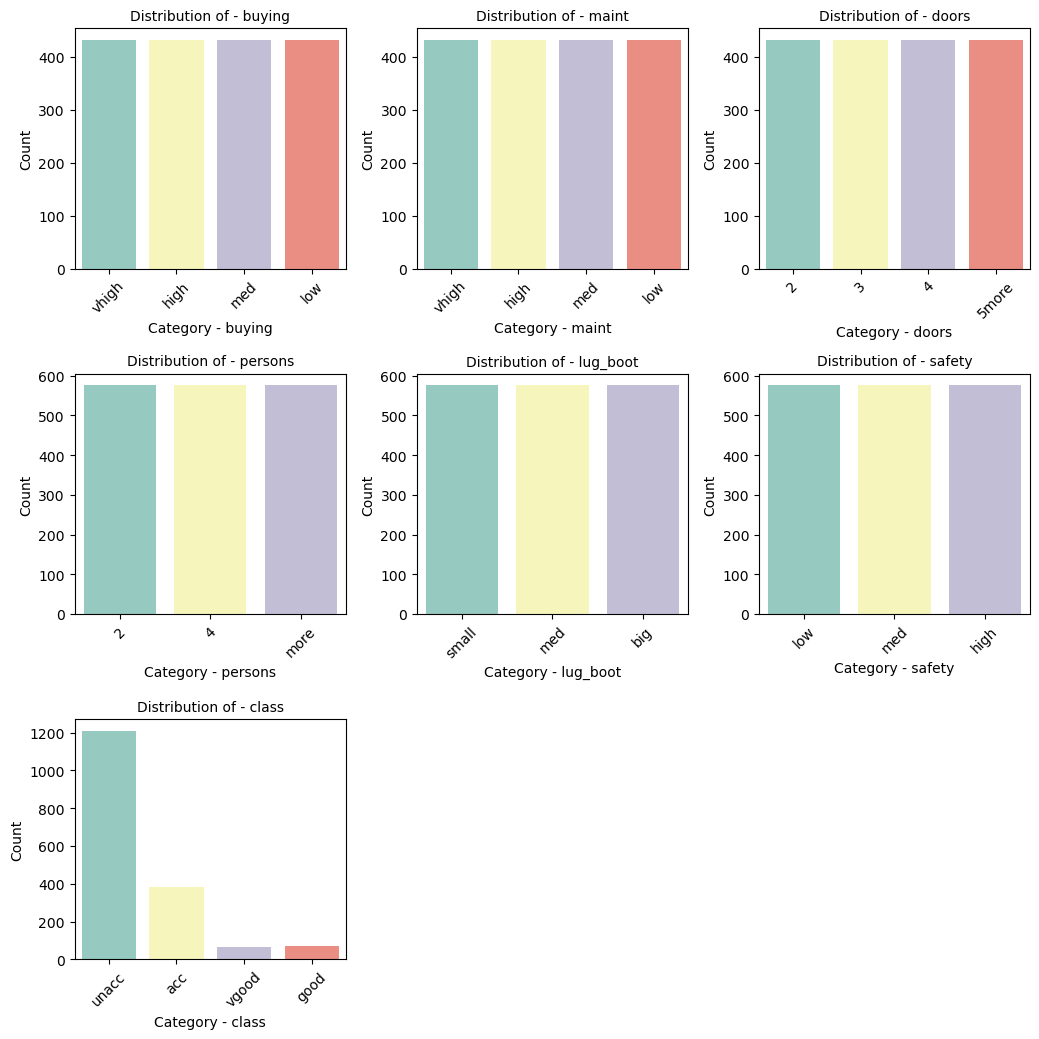

In [13]:
num_cols = len(df.columns)
ncols = 3
nrows = -(-num_cols // ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 3.5, nrows * 3.5))
for i, col_name in enumerate(df.columns):
    row = i // ncols
    col = i % ncols
    ax = axes[row, col] if nrows > 1 else axes[col]
    sns.countplot(x=col_name, hue=col_name, data=df, palette="Set3", ax=ax, legend=False)
    ax.set_title(f"Distribution of - {col_name}", fontsize=10)
    ax.set_xlabel(f"Category - {col_name}", fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.tick_params(axis='x', rotation=45)

if num_cols < nrows * ncols:
    for i in range(num_cols, nrows * ncols):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

In [14]:
encoding_data, encoded_label = categories_encoded(df, "../data/car_evaluation_encoded.csv")

Encoded data has been saved to: ../data/car_evaluation_encoded.csv
Label mapping for column 'buying': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
Label mapping for column 'maint': {'vhigh': 0, 'high': 1, 'med': 2, 'low': 3}
Label mapping for column 'doors': {'2': 0, '3': 1, '4': 2, '5more': 3}
Label mapping for column 'persons': {'2': 0, '4': 1, 'more': 2}
Label mapping for column 'lug_boot': {'small': 0, 'med': 1, 'big': 2}
Label mapping for column 'safety': {'low': 0, 'med': 1, 'high': 2}
Label mapping for column 'class': {'unacc': 0, 'acc': 1, 'vgood': 2, 'good': 3}


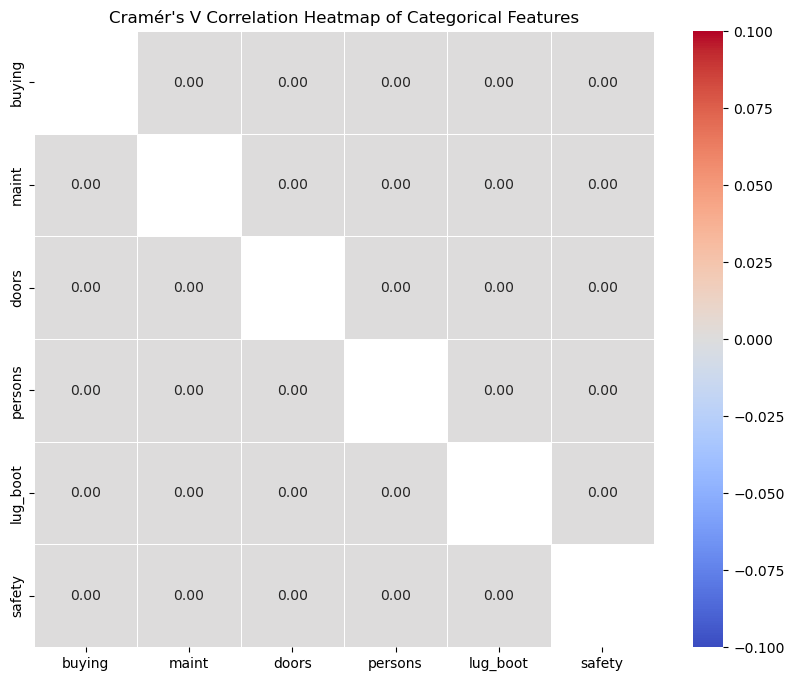

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

categorical_columns = encoding_data.drop(columns=['class'])

cramers_v_matrix = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        if col1 != col2 and pd.isna(cramers_v_matrix.loc[col1, col2]):

            contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])

            chi2, p, dof, expected = chi2_contingency(contingency_table)

            n = contingency_table.sum().sum()
            k = min(contingency_table.shape) - 1
            cramers_v = np.sqrt(chi2 / (n * k))

            cramers_v_matrix.loc[col1, col2] = cramers_v
            cramers_v_matrix.loc[col2, col1] = cramers_v

cramers_v_matrix = cramers_v_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Correlation Heatmap of Categorical Features")
plt.show()

In [16]:
vif_result = calculate_vif(encoding_data)
print(vif_result)

    Feature       VIF
0    buying  2.400702
1     maint  2.372981
2     doors  2.379372
3   persons  2.283765
4  lug_boot  2.158033
5    safety  2.386350
6     class  1.837062


In [18]:
X = df.drop(columns=['class'], axis=1)

y = df['class']

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X = encoder.fit_transform(X)
X

,buying,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [20]:
# merge y and X
yX = pd.concat([y, X], axis=1)
display(yX)

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,1,1,1,1,1,1
1,unacc,1,1,1,1,1,2
2,unacc,1,1,1,1,1,3
3,unacc,1,1,1,1,2,1
4,unacc,1,1,1,1,2,2
...,...,...,...,...,...,...,...
1723,good,4,4,4,3,2,2
1724,vgood,4,4,4,3,2,3
1725,unacc,4,4,4,3,3,1
1726,good,4,4,4,3,3,2


In [23]:
# drop all NaN values
display(yX.dropna())

yX_fixed = yX.dropna()

yX_array = yX_fixed.to_numpy()
print(yX_array.shape)

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,1,1,1,1,1,1
1,unacc,1,1,1,1,1,2
2,unacc,1,1,1,1,1,3
3,unacc,1,1,1,1,2,1
4,unacc,1,1,1,1,2,2
...,...,...,...,...,...,...,...
1723,good,4,4,4,3,2,2
1724,vgood,4,4,4,3,2,3
1725,unacc,4,4,4,3,3,1
1726,good,4,4,4,3,3,2


(1728, 7)


## Main

In this section we tried 2 different configurations with the hyperparameters to reproduce the previous work and to make adjustment on the hyperparameters.

### Reproduce the previous work

(The link to the previou work we are reproducing: https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook)

To reproduce, we set the exact same hyperparameters as those in the link article. The `test_size` and `random_state` of the `train_test_split` is 0.33 and 42. The `max_depth` of the CART is 3. 

In [43]:
import warnings

warnings.filterwarnings('ignore') # just to ignore warnings

In [44]:
# Split the data into training and testing sets
train, test = train_test_split(yX_array, test_size=0.33, random_state=42)

# Train the model
cart_model = CARTClassifier(train, max_depth=3)

# Print the confusion matrix and classification report
print('===== Confusion Matrix =====')
print(confusion_matrix(test[:, 0], cart_model.predict_vec(test)))
print('\n\n===== Classification Report =====')
print(classification_report(test[:, 0], cart_model.predict_vec(test)))

# Print the tree
print('\n\n===== Print Tree =====')
cart_model.print_tree()
print('\n\n')

===== Confusion Matrix =====
[[385  12   0   0]
 [ 56  73   0   0]
 [  0  20   0   0]
 [  0  25   0   0]]


===== Classification Report =====
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       397
           1       0.56      0.57      0.56       129
           2       0.00      0.00      0.00        20
           3       0.00      0.00      0.00        25

    accuracy                           0.80       571
   macro avg       0.36      0.38      0.37       571
weighted avg       0.73      0.80      0.77       571



===== Print Tree =====
---START PRINT TREE---
split attribute = 14; gain = 0.070073; number of samples = 1157
0 -> split attribute = 10; gain = 0.147689; number of samples = 771
		0 -> split attribute = 2; gain = 0.058023; number of samples = 525
				0 -> 1.0
				1 -> 0.0
		1 -> 0.0
1 -> 0.0
----END PRINT TREE---





As the result, the confusion matrix, the classification report and the printed-tree are all the same as the reference article, which means we've succeeded in reproducing the article. 

### Small adjustment

Because it is abnormal to set the `max_depth` as 3 in practice, we decided to re-run the model, set `max_depth` as 1000 and keep the other hyperparameters to see the result. (It is also the result we put on our slides.) 

In [45]:
# Split the data into training and testing sets
train, test = train_test_split(yX_array, test_size=0.33, random_state=42)

# Train the model
cart_model = CARTClassifier(train, max_depth=1000)

# Print the confusion matrix and classification report
print('===== Confusion Matrix =====')
print(confusion_matrix(test[:, 0], cart_model.predict_vec(test)))
print('\n\n===== Classification Report =====')
print(classification_report(test[:, 0], cart_model.predict_vec(test)))

# Print the tree
print('\n\n===== Print Tree =====')
cart_model.print_tree()
print('\n\n')

===== Confusion Matrix =====
[[385  11   1   0]
 [ 56  62  11   0]
 [  0   8  11   1]
 [  0  17   1   7]]


===== Classification Report =====
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       397
           1       0.63      0.48      0.55       129
           2       0.46      0.55      0.50        20
           3       0.88      0.28      0.42        25

    accuracy                           0.81       571
   macro avg       0.71      0.57      0.60       571
weighted avg       0.80      0.81      0.80       571



===== Print Tree =====
---START PRINT TREE---
split attribute = 14; gain = 0.070073; number of samples = 1157
0 -> split attribute = 10; gain = 0.147689; number of samples = 771
		0 -> split attribute = 2; gain = 0.058023; number of samples = 525
				0 -> split attribute = 6; gain = 0.093667; number of samples = 254
						0 -> split attribute = 15; gain = 0.108550; number of samples = 64
								0 -> split attribute =

This result seems much better than previous work.

## Unit Test

### Test Model 1

In [46]:
np.random.seed(0)
random.seed(0)

# Tests for node_score_gini with binary class
assert node_score_gini([1,1,1,1,1]) == node_score_gini([0,0,0,0,0]) == 0
assert node_score_gini([1,1,0,0,0]) == .48

# Creates Test Model and Dummy Data
x1 = np.array(([[1, 1, 0, 3], [1, 4, 1, 2], [1, 4, 1, 0], [0, 1, 0, 1], [0, 2, 1, 1], [1, 4, 0, 0]]))
test_model1 = CARTClassifier(x1)

# Test for majority_class
assert test_model1.majority_class == 1

# Tests for _is_terminal (threshold are values, if value<=threshold then to the left child)
test1_node1 = Node(left=None, right=None, depth=0, index_split_on=2, isleaf=False, label=1)
test1_node2 = Node(left=None, right=None, depth=1, index_split_on=None, isleaf=True, label=1)
test1_node3 = Node(left=None, right=None, depth=1, index_split_on=5, isleaf=False, label=0)
test1_node4 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=1)
test1_node5 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=0)

x1_one_hot = np.array([[1,1,1,1,0,0,0],
                       [1,0,0,0,0,0,1],
                       [1,0,0,0,1,1,1],
                       [0,1,1,1,0,1,1],
                       [0,0,1,0,0,1,1],
                       [1,0,0,1,1,1,1]]
)
x1_filtered_node2 = np.array([row for row in x1_one_hot if row[2] == 0])
x1_filtered_node3 = np.array([row for row in x1_one_hot if row[2] == 1])
x1_filtered_node4 = np.array([row for row in x1_filtered_node3 if row[5] == 0])
x1_filtered_node5 = np.array([row for row in x1_filtered_node3 if row[5] == 1])

assert test_model1._is_terminal(node=test1_node1, data=x1_one_hot, indices=[1,2,3,4,5,6]) == (False, 1)
assert test_model1._is_terminal(node=test1_node2, data=x1_filtered_node2, indices=[1,3,4,5,6]) == (True, 1)
assert test_model1._is_terminal(node=test1_node3, data=x1_filtered_node3, indices=[1,3,4,5,6]) == (False, 0)
assert test_model1._is_terminal(node=test1_node4, data=x1_filtered_node4, indices=[1,3,4,6]) == (True, 1)
assert test_model1._is_terminal(node=test1_node5, data=x1_filtered_node5, indices=[1,3,4,6]) == (True, 0)

# Tests _calc_gain
x1_original_node3 = np.array([row for row in x1 if row[2] == 1])
# Testing gain for index 2 in root, which is the max gain when splitting x1
assert test_model1._calc_gain(x1_one_hot, 2, node_score_gini) == pytest.approx(0.222, .01)
# Testing gain for index 5 in node3, which is the max gain when splitting data in node 3
assert test_model1._calc_gain(x1_filtered_node3, 5, node_score_gini) == pytest.approx(0.444, .01)

# Check Tree is created Properly, Compare with text below
test_model1.print_tree()

# Tests _prune_recurs
# Pruned tree should be smaller
# with higher training loss and lower validation loss
# The third feature of the second point in x_val1 is 5, which does not exist in our training set. We should still be able to classify it.
x_val1 = np.array([[1,4,0,2],[0,2,1,5]])

print('training loss not pruned:', test_model1.loss(x1))
print('validation loss not pruned:', test_model1.loss(x_val1), '\n')

test_model1_pruned = CARTClassifier(x1,validation_data=x_val1)
test_model1_pruned.print_tree()
print('training loss pruned:', test_model1_pruned.loss(x1))
print('validation loss pruned:', test_model1_pruned.loss(x_val1))

---START PRINT TREE---
split attribute = 2; gain = 0.222222; number of samples = 6
0 -> 1.0
1 -> split attribute = 5; gain = 0.444444; number of samples = 3
		0 -> 1.0
		1 -> 0.0
----END PRINT TREE---
training loss not pruned: 0.0
validation loss not pruned: 0.5 

---START PRINT TREE---
split attribute = 2; gain = 0.222222; number of samples = 6
0 -> 1.0
1 -> 0.0
----END PRINT TREE---
training loss pruned: 0.16666666666666666
validation loss pruned: 0.0


### Test Model 2

In [47]:
# Tests for node_score_gini with multiclass
assert node_score_gini([0,0,0,0,0]) == node_score_gini([1,1,1,1,1]) == node_score_gini([2,2,2,2,2]) == 0
assert node_score_gini([1,1,0,0,2]) == pytest.approx(.64, .01)

# Creates Test Model and Dummy Data
x2 = np.array([[1, 1, 0, 3], [0, 1, 1, 2], [2, 0, 1, 1], [2, 0, 0, 3],
               [0, 0, 1, 3], [1, 1, 0, 1], [1, 1, 1, 3], [0, 1, 0, 2]])
test_model2 = CARTClassifier(x2)

# Test for majority_class
assert test_model2.majority_class == 0

# Tests for _is_terminal (threshold are values, if value<=threshold then to the left child)
test2_node1 = Node(left=None, right=None, depth=0, index_split_on=1, isleaf=False, label=0)
test2_node2 = Node(left=None, right=None, depth=1, index_split_on=4, isleaf=False, label=1)
test2_node3 = Node(left=None, right=None, depth=1, index_split_on=2, isleaf=False, label=2)
test2_node4 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=1)
test2_node5 = Node(left=None, right=None, depth=2, index_split_on=3, isleaf=False, label=0)
test2_node6 = Node(left=None, right=None, depth=2, index_split_on=3, isleaf=False, label=0)
test2_node7 = Node(left=None, right=None, depth=2, index_split_on=None, isleaf=True, label=2)
test2_node8 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=0)
test2_node9 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=1)
test2_node10 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=0)
test2_node11 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=2)

x2_one_hot = np.array([[1,0,1,0,0],
                       [0,0,0,0,1],
                       [2,1,0,1,1],
                       [2,1,1,0,0],
                       [0,1,0,0,0],
                       [1,0,1,1,1],
                       [1,0,0,0,0],
                       [0,0,1,0,1]]
)
x2_filtered_node2 = np.array([row for row in x2_one_hot if row[1] == 0])
x2_filtered_node3 = np.array([row for row in x2_one_hot if row[1] == 1])
x2_filtered_node4 = np.array([row for row in x2_filtered_node2 if row[4] == 0])
x2_filtered_node5 = np.array([row for row in x2_filtered_node2 if row[4] == 1])
x2_filtered_node6 = np.array([row for row in x2_filtered_node3 if row[2] == 0])
x2_filtered_node7 = np.array([row for row in x2_filtered_node3 if row[2] == 1])
x2_filtered_node8 = np.array([row for row in x2_filtered_node5 if row[3] == 0])
x2_filtered_node9 = np.array([row for row in x2_filtered_node5 if row[3] == 1])
x2_filtered_node10 = np.array([row for row in x2_filtered_node6 if row[3] == 0])
x2_filtered_node11 = np.array([row for row in x2_filtered_node6 if row[3] == 1])

assert test_model2._is_terminal(node=test2_node1, data=x2_one_hot, indices=[1,2,3,4]) == (False, 0)
assert test_model2._is_terminal(node=test2_node2, data=x2_filtered_node2, indices=[2,3,4]) == (False, 1)
assert test_model2._is_terminal(node=test2_node3, data=x2_filtered_node3, indices=[2,3,4]) == (False, 2)

assert test_model2._is_terminal(node=test2_node4, data=x2_filtered_node4, indices=[2,3]) == (True, 1)
assert test_model2._is_terminal(node=test2_node5, data=x2_filtered_node5, indices=[2,3]) == (False, 0)
assert test_model2._is_terminal(node=test2_node6, data=x2_filtered_node6, indices=[3,4]) == (False, 0)
assert test_model2._is_terminal(node=test2_node7, data=x2_filtered_node7, indices=[3,4]) == (True, 2)
assert test_model2._is_terminal(node=test2_node8, data=x2_filtered_node8, indices=[2]) == (True, 0)
assert test_model2._is_terminal(node=test2_node9, data=x2_filtered_node9, indices=[2]) == (True, 1)
assert test_model2._is_terminal(node=test2_node10, data=x2_filtered_node10, indices=[4]) == (True, 0)

# Tests _calc_gain
# Testing gain for index 1 in x2
assert test_model2._calc_gain(x2, 1, node_score_gini) == pytest.approx(0.18958333, .01)
# Testing gain for index 4 in x2_filtered_node2
assert test_model2._calc_gain(x2_filtered_node2, 4, node_score_gini) == pytest.approx(0.21333, .01)
# Testing gain for index 2 in x2_filtered_node3
assert test_model2._calc_gain(x2_filtered_node5, 2, node_score_gini) == pytest.approx(0.111, .01)

# Check Tree is created Properly, Compare with text below
test_model2.print_tree()

# Tests _prune_recurs
# Pruned tree should be smaller
# with higher training loss and lower validation loss
x_val2 = np.array([[2,0,0,2],[0,1,1,1]])

print('training loss not pruned:', test_model2.loss(x2))
print('validation loss not pruned:', test_model2.loss(x_val2), '\n')

test_model2_pruned = CARTClassifier(x2,validation_data=x_val2)
test_model2_pruned.print_tree()
print('training loss pruned:', test_model2_pruned.loss(x2))
print('validation loss pruned:', test_model2_pruned.loss(x_val2))

---START PRINT TREE---
split attribute = 1; gain = 0.189583; number of samples = 8
0 -> split attribute = 4; gain = 0.213333; number of samples = 5
		0 -> 1.0
		1 -> split attribute = 3; gain = 0.444444; number of samples = 3
				0 -> 0.0
				1 -> 1.0
1 -> split attribute = 2; gain = 0.111111; number of samples = 3
		0 -> 0.0
		1 -> 2.0
----END PRINT TREE---
training loss not pruned: 0.125
validation loss not pruned: 0.5 

---START PRINT TREE---
split attribute = 1; gain = 0.189583; number of samples = 8
0 -> split attribute = 4; gain = 0.213333; number of samples = 5
		0 -> 1.0
		1 -> 0.0
1 -> 2.0
----END PRINT TREE---
training loss pruned: 0.25
validation loss pruned: 0.0
